# Importing libraries

In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re

# Web Scraping - scraping the award winning flims from wikipedia

Library - BeautifulSoup

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_Academy_Award-winning_films"
req = requests.get(url)

In [4]:
req

<Response [200]>

In [5]:
soup = BeautifulSoup(req.content)

In [6]:
soup.prettify()

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" dir="ltr" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   List of Academy Award–winning films - Wikipedia\n  </title>\n  <script>\n   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-

In [7]:
Film = []
Year =[]
Award = []
Nomination = []
count = 0

for i in soup.findAll('td'):
  i = re.sub('^<td>.*">|<td>|</td>|<.*>|\n',"",str(i))
  if count == 0:
    Film.append(i)
    count += 1
  elif count == 1:
    Year.append(i)
    count += 1
  elif count == 2:
    Award.append(i)
    count += 1
  else:
    count = 0
    Nomination.append(i)

In [8]:
len(Film)

1363

In [9]:
len(Year)

1363

In [10]:
len(Award)

1362

In [11]:
len(Nomination)

1362

In [12]:
Film[1331]

'What Ever Happened to Baby Jane?'

In [13]:
oscar = pd.DataFrame({"Film":Film[:1332], "Years":Year[:1332], "Awards":Award[:1332], "Nominations":Nomination[:1332]})

In [14]:
oscar.tail(10)

,Film,Years,Awards,Nominations
1322,Waikiki Wedding,1937,1,2
1323,The Walls of Malapaga,1950,0 (1),0
1324,The War of the Worlds,1953,1,3
1325,Watch on the Rhine,1943,1,4
1326,Water Birds,1952,1,1
1327,The Way of All Flesh,28,1,1
1328,West Side Story,1961,10,11
1329,The Westerner,1940,1,3
1330,The Wetback Hound,1957,1,1
1331,What Ever Happened to Baby Jane?,1962,1,5


In [15]:
oscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Film         1332 non-null   object
 1   Years        1332 non-null   object
 2   Awards       1332 non-null   object
 3   Nominations  1332 non-null   object
dtypes: object(4)
memory usage: 41.8+ KB


Data is cleaned to explore.

1. How are awards and nominations distributed across films?

In [16]:
df=oscar.copy()

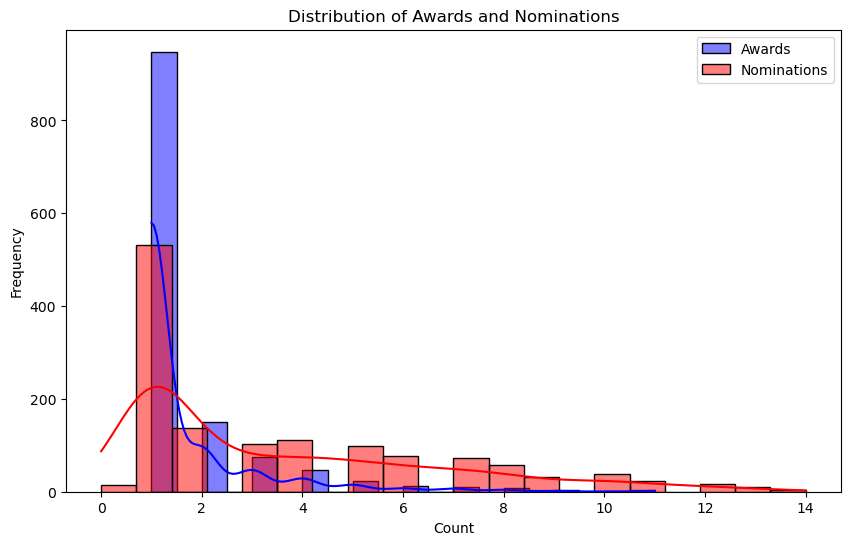

In [17]:
# Convert Awards and Nominations to numeric
df['Awards'] = pd.to_numeric(df['Awards'], errors='coerce')
df['Nominations'] = pd.to_numeric(df['Nominations'], errors='coerce')

# Plot distribution of Awards and Nominations
plt.figure(figsize=(10, 6))
sns.histplot(df['Awards'], bins=20, color='blue', label='Awards', kde=True)
sns.histplot(df['Nominations'], bins=20, color='red', label='Nominations', kde=True)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Awards and Nominations')
plt.legend()
plt.show()


2. Which films have received the most awards and nominations?

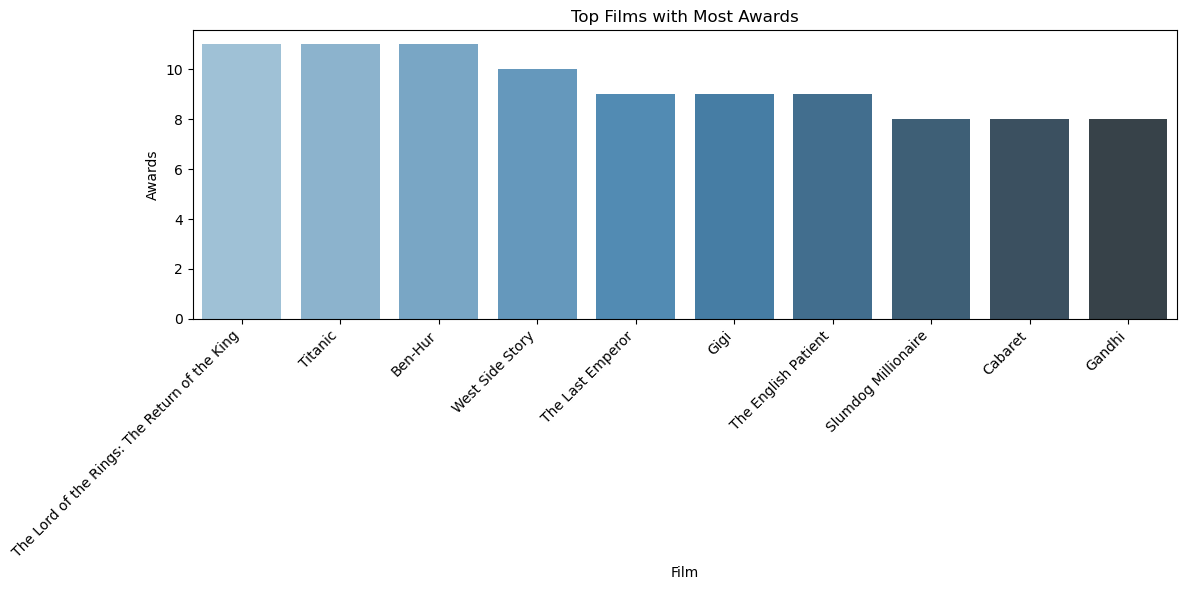

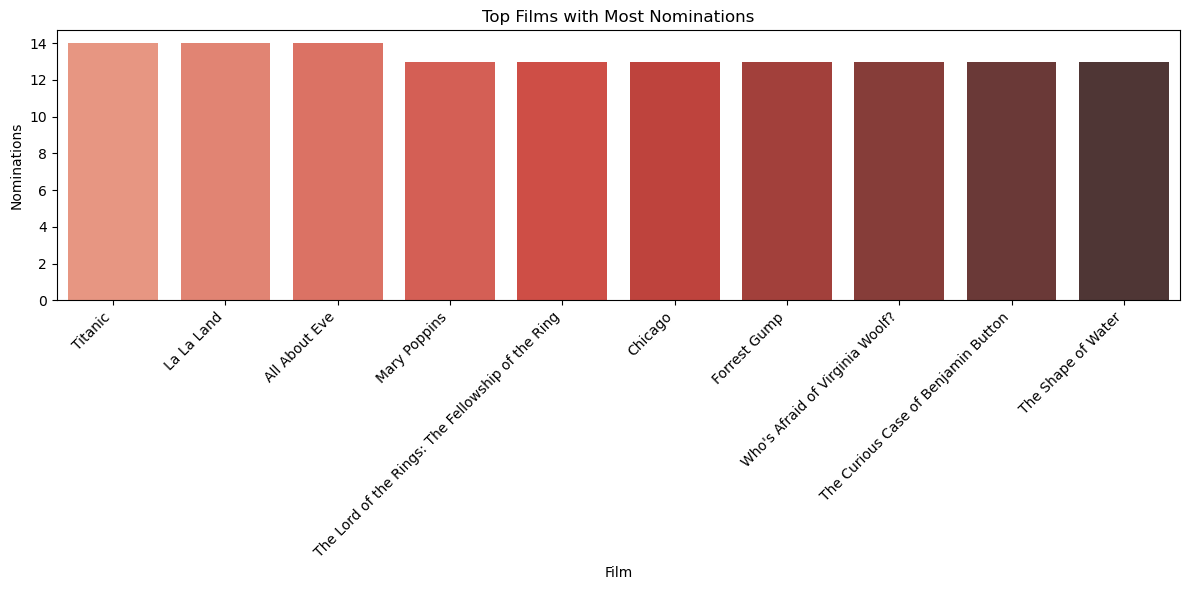

In [18]:
# Sort the DataFrame by Awards and Nominations
top_awards = df.sort_values(by='Awards', ascending=False).head(10)
top_nominations = df.sort_values(by='Nominations', ascending=False).head(10)

# Plot top films with most Awards and Nominations
plt.figure(figsize=(12, 6))
sns.barplot(x='Film', y='Awards', data=top_awards, palette='Blues_d')
plt.xlabel('Film')
plt.ylabel('Awards')
plt.title('Top Films with Most Awards')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Film', y='Nominations', data=top_nominations, palette='Reds_d')
plt.xlabel('Film')
plt.ylabel('Nominations')
plt.title('Top Films with Most Nominations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


3. How have awards and nominations changed over the years?

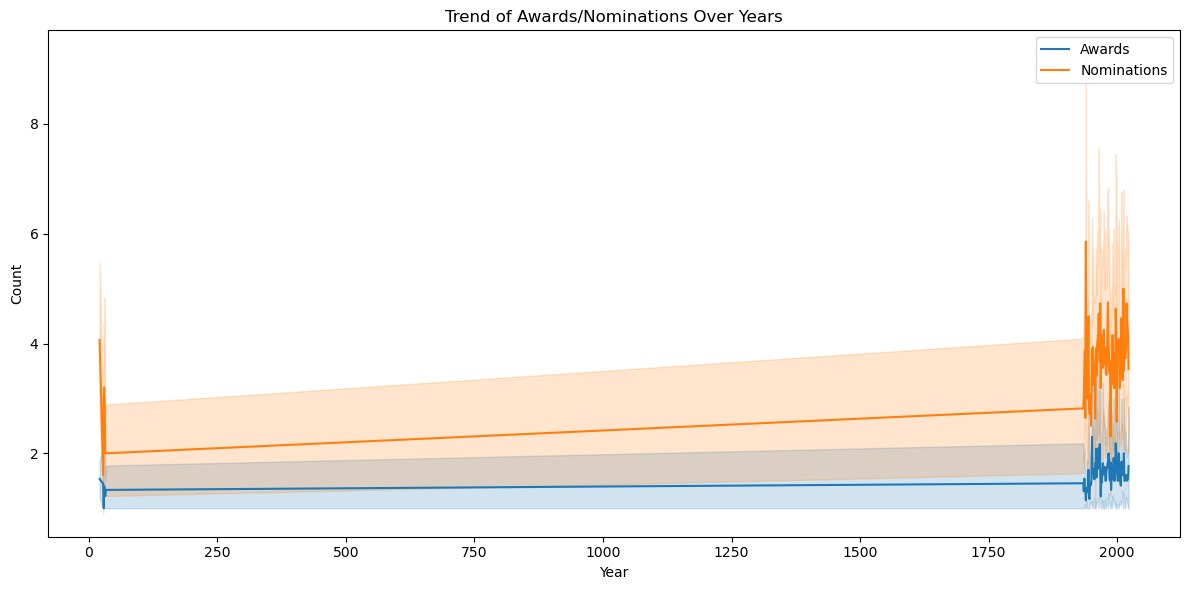

In [19]:
# Convert Years to numeric
df['Years'] = pd.to_numeric(df['Years'], errors='coerce')

# Plot trend of Awards and Nominations over Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Years', y='Awards', data=df, label='Awards')
sns.lineplot(x='Years', y='Nominations', data=df, label='Nominations')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Trend of Awards/Nominations Over Years')
plt.legend()
plt.tight_layout()
plt.show()


4. Awards/Nominations Ratio Analysis:

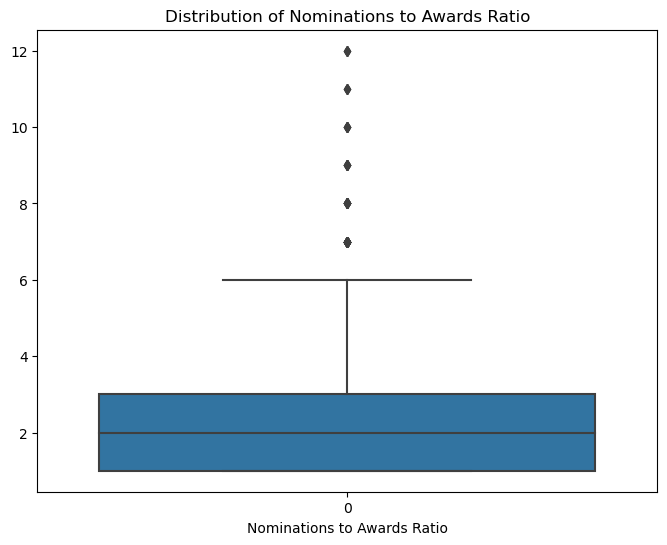

Outliers with exceptionally high or low ratios:
                              Film  Nominations_to_Awards_Ratio
25            The Power of the Dog                         12.0
685                      Chinatown                         11.0
853                         Becket                         12.0
1056                Johnny Belinda                         12.0
1126  Mr. Smith Goes to Washington                         11.0
1178      The Pride of the Yankees                         11.0


In [20]:
# Convert Awards and Nominations to numeric
df['Awards'] = pd.to_numeric(df['Awards'], errors='coerce')
df['Nominations'] = pd.to_numeric(df['Nominations'], errors='coerce')

# Calculate the ratio of nominations to awards
df['Nominations_to_Awards_Ratio'] = df['Nominations'] / df['Awards']

# Plot the distribution of the ratio
plt.figure(figsize=(8, 6))
sns.boxplot(df['Nominations_to_Awards_Ratio'])
plt.title('Distribution of Nominations to Awards Ratio')
plt.xlabel('Nominations to Awards Ratio')
plt.show()

# Identify outliers with exceptionally high or low ratios
outliers = df[(df['Nominations_to_Awards_Ratio'] > 10) | (df['Nominations_to_Awards_Ratio'] < 0.1)]
print("Outliers with exceptionally high or low ratios:")
print(outliers[['Film', 'Nominations_to_Awards_Ratio']])


5. Temporal Trends Analysis:

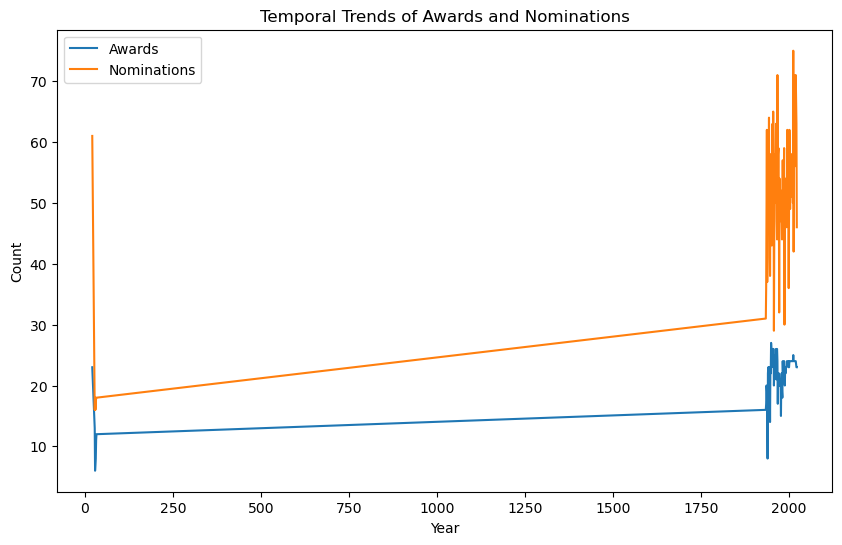

In [21]:
# Group the data by year and calculate the total number of awards and nominations for each year
yearly_totals = df.groupby('Years').agg({'Awards': 'sum', 'Nominations': 'sum'}).reset_index()

# Plot the temporal trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Years', y='Awards', data=yearly_totals, label='Awards')
sns.lineplot(x='Years', y='Nominations', data=yearly_totals, label='Nominations')
plt.title('Temporal Trends of Awards and Nominations')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()
